In [2]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

2024-09-24 10:40:11.661009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-24 10:40:11.661036: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


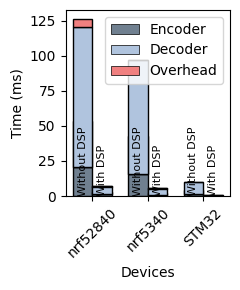

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
devices = ['nrf52840', 'nrf5340', 'STM32']

# Complete model times
completemodel_dsp_without = [126.3, 96.64, 10.11]
completemodel_dsp_with = [6.57, 5.22, 0.56]

# Encoder and decoder times
encoder_without = [20.37, 15.78, 1.65]
encoder_with = [1.12, 0.89, 0.10]
decoder_without = [33.28, 27.00, 2.82]
decoder_with = [1.95, 1.54, 0.16]

# Overhead calculation
overhead_without = np.array(completemodel_dsp_without) - (np.array(encoder_without) + 3 * np.array(decoder_without))
overhead_with = np.array(completemodel_dsp_with) - (np.array(encoder_with) + 3 * np.array(decoder_with))

# X-axis setup
x = np.arange(len(devices))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(2.5, 3))
#'slategrey', 'lightsteelblue'

# Bars for 'without DSP'
p1 = ax.bar(x - width/2, encoder_without, width, label='Encoder', color='slategrey',edgecolor='black')
p2 = ax.bar(x - width/2, decoder_without, width, bottom=encoder_without, color='lightsteelblue',edgecolor='black')
p3 = ax.bar(x - width/2, 3 * np.array(decoder_without), width, bottom=(np.array(encoder_without)), color='lightsteelblue',edgecolor='black')
p4 = ax.bar(x - width/2, overhead_without, width, bottom=(np.array(encoder_without) + 3 * np.array(decoder_without)), color='lightcoral',edgecolor='black')

# Bars for 'with DSP'
p5 = ax.bar(x + width/2, encoder_with, width, color='slategrey', edgecolor='black')
p6 = ax.bar(x + width/2, decoder_with, width, bottom=encoder_with, color='lightsteelblue',edgecolor='black')
p7 = ax.bar(x + width/2, 3 * np.array(decoder_with), width, bottom=(np.array(encoder_with)), color='lightsteelblue',edgecolor='black')
p8 = ax.bar(x + width/2, overhead_with, width, bottom=(np.array(encoder_with) + 3 * np.array(decoder_with)), color='lightcoral',edgecolor='black')

# Adding labels to the bars
for i in range(len(devices)):
    # Text for 'Without DSP'
    ax.text(x[i] - width/2, 0.11, 'Without DSP', ha='center', va='bottom', fontsize=8, rotation=90, color='black')  # Adjust text size and position
    # Text for 'With DSP'
    ax.text(x[i] + width/2, 0.11, 'With DSP', ha='center', va='bottom', fontsize=8, rotation=90, color='black')  # Adjust text size and position

# Labels and titles
ax.set_xlabel('Devices')
ax.set_ylabel('Time (ms)')
#ax.set_title('Model Time Breakdown with and without DSP')
ax.set_xticks(x)
ax.set_xticklabels(devices,rotation=45)

# Custom legend
custom_legend = [plt.Rectangle((0,0),1,1,color='slategrey',ec='k', lw=0.5), 
                 plt.Rectangle((0,0),1,1,color='lightsteelblue',ec='k', lw=0.5),
                 plt.Rectangle((0,0),1,1,color='lightcoral',ec='k', lw=0.5)]
ax.legend(custom_legend, ['Encoder', 'Decoder', 'Overhead'], loc='upper right')
#ax.set_yscale('log')
plt.tight_layout()
plt.savefig("Plots/EnergyTracecombined.pdf", format="pdf", bbox_inches="tight", dpi=200)
plt.show()


/tmp/ipykernel_113450/3705781978.py:69: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


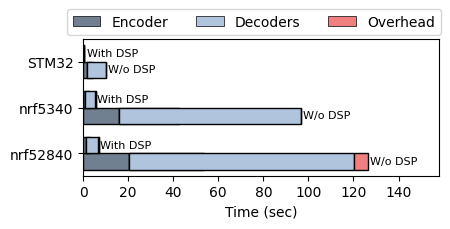

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
devices = ['nrf52840', 'nrf5340', 'STM32']

# Complete model times
completemodel_dsp_without = [126.3, 96.64, 10.11]
completemodel_dsp_with = [6.57, 5.22, 0.56]

# Encoder and decoder times
encoder_without = [20.37, 15.78, 1.65]
encoder_with = [1.12, 0.89, 0.10]
decoder_without = [33.28, 27.00, 2.82]
decoder_with = [1.95, 1.54, 0.16]

# Overhead calculation
overhead_without = np.array(completemodel_dsp_without) - (np.array(encoder_without) + 3 * np.array(decoder_without))
overhead_with = np.array(completemodel_dsp_with) - (np.array(encoder_with) + 3 * np.array(decoder_with))

# X-axis setup
y = np.arange(len(devices))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(4.6, 2.4))  # Increased width of the figure

# Horizontal Bars for 'without DSP'
p1 = ax.barh(y - width/2, encoder_without, width, label='Encoder', color='slategrey', edgecolor='black')
p2 = ax.barh(y - width/2, decoder_without, width, left=encoder_without, color='lightsteelblue', edgecolor='black')
p3 = ax.barh(y - width/2, 3 * np.array(decoder_without), width, left=np.array(encoder_without), color='lightsteelblue', edgecolor='black')
p4 = ax.barh(y - width/2, overhead_without, width, left=np.array(encoder_without) + 3 * np.array(decoder_without), color='lightcoral', edgecolor='black')

# Horizontal Bars for 'with DSP'
p5 = ax.barh(y + width/2, encoder_with, width, color='slategrey', edgecolor='black')
p6 = ax.barh(y + width/2, decoder_with, width, left=encoder_with, color='lightsteelblue', edgecolor='black')
p7 = ax.barh(y + width/2, 3 * np.array(decoder_with), width, left=np.array(encoder_with), color='lightsteelblue', edgecolor='black')
p8 = ax.barh(y + width/2, overhead_with, width, left=np.array(encoder_with) + 3 * np.array(decoder_with), color='lightcoral', edgecolor='black')

# Adding labels after the bars
for i in range(len(devices)):
    # Calculate the total width for the 'Without DSP' bar group
    total_width_without = encoder_without[i] + 3 * decoder_without[i] + overhead_without[i]
    # Place 'Without DSP' text after the bars
    ax.text(total_width_without + 1, y[i] - width/2, 'W/o DSP', ha='left', va='center', fontsize=8, color='black')  # 1 is the padding distance
    
    # Calculate the total width for the 'With DSP' bar group
    total_width_with = encoder_with[i] + 3 * decoder_with[i] + overhead_with[i]
    # Place 'With DSP' text after the bars
    ax.text(total_width_with + 1, y[i] + width/2, 'With DSP', ha='left', va='center', fontsize=8, color='black')  # 1 is the padding distance

# Adjusting the x-axis limit to ensure text fits inside the plot
max_total_width = max(max(completemodel_dsp_without), max(completemodel_dsp_with))
ax.set_xlim(0, max_total_width * 1.25)  # Add 25% more space for the text

# Labels and titles
ax.set_xlabel('Time (sec)')  # Swap Y to X axis
ax.set_yticks(y)
ax.set_yticklabels(devices)

# Custom legend
custom_legend = [plt.Rectangle((0, 0), 1, 1, color='slategrey', ec='k', lw=0.5), 
                 plt.Rectangle((0, 0), 1, 1, color='lightsteelblue', ec='k', lw=0.5),
                 plt.Rectangle((0, 0), 1, 1, color='lightcoral', ec='k', lw=0.5)]
plt.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust the rect parameter to make room at the top for the legend

ax.legend(custom_legend, ['Encoder', 'Decoders', 'Overhead'], loc='upper center', ncol=3,  bbox_to_anchor=(0.48, 1.27))

plt.tight_layout()
plt.savefig("Plots/EnergyTracecombined_horizontal.pdf", format="pdf", bbox_inches="tight", dpi=600)
plt.show()


In [1]:
columns = ["Timestamp(ms)", "Current(uA)"]

s = pd.read_csv("Plots/sta.csv", usecols=columns)
s = s.iloc[:24000]
s = s.iloc[-2000:]
s.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
s.rename(columns={"Current(uA)": "current"}, inplace=True)

NameError: name 'pd' is not defined

In [3]:


plt.rcParams["figure.figsize"] = [7.00, 4.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 14})



df = pd.read_csv("Plots/encoder.csv", usecols=columns)
df.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df.rename(columns={"Current(uA)": "current"}, inplace=True)

df1 = pd.read_csv("Plots/decoder1.csv", usecols=columns)
df1.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df1.rename(columns={"Current(uA)": "current"}, inplace=True)

df2 = pd.read_csv("Plots/decoder2.csv", usecols=columns)
df2.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df2.rename(columns={"Current(uA)": "current"}, inplace=True)

df3 = pd.read_csv("Plots/decoder3.csv", usecols=columns)
df3.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df3.rename(columns={"Current(uA)": "current"}, inplace=True)


plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Current Consumption (µA)', fontsize=14)


plt.plot(s.time -2900, s.current, color='purple', label = 'STA/LTA')
plt.plot(df.time-9600 , df.current, color='lightcoral', label = 'Intermediate block')
plt.plot(df1.time-12600, df1.current, color='yellowgreen', label = 'Detection block')
plt.plot(df2.time-3580, df2.current, color='orange', label = 'P-pick block')
plt.plot(df3.time+5500, df3.current, color='lightskyblue', label = 'S-pick block')

legend_elements = [
    plt.Line2D([0], [0], color='purple', label='STA/LTA'),
    plt.Line2D([0], [0], color='yellowgreen', label='Detection block'),
    plt.Line2D([0], [0], color='orange', label='P-pick block'),
    plt.Line2D([0], [0], color='lightcoral', label='Intermediate block'),
    plt.Line2D([0], [0], color='lightskyblue', label='S-pick block'),
]


#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),fontsize=12)

plt.legend(handles=legend_elements, loc="center", bbox_to_anchor=(0.50, 1.2), ncol=2, fontsize=14)


plt.savefig("Plots/EnergyTrace.pdf", format="pdf", bbox_inches="tight", dpi=1000)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/encoder.csv'

In [ ]:
avg_current_s = s['current'].mean()
avg_current_df = df['current'].mean()
avg_current_df1 = df1['current'].mean()
avg_current_df2 = df2['current'].mean()
avg_current_df3 = df3['current'].mean()

# Print or use the average current values as needed
print(f"Average Current for STA/LTA: {avg_current_s} µA")
print(f"Average Current for Intermediate block: {avg_current_df} µA")
print(f"Average Current for Detection block: {avg_current_df1} µA")
print(f"Average Current for P-pick block: {avg_current_df2} µA")
print(f"Average Current for S-pick block: {avg_current_df3} µA")

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [4.2, 2.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 9.5})

columns = ["Timestamp(ms)", "Current(uA)"]
df = pd.read_csv("Plots/encodernodsp.csv", usecols=columns)
df.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df.rename(columns={"Current(uA)": "current"}, inplace=True)

df1 = pd.read_csv("Plots/encoder.csv", usecols=columns)
df1.rename(columns={"Timestamp(ms)": "time"}, inplace=True)
df1.rename(columns={"Current(uA)": "current"}, inplace=True)


plt.xlabel('Time (sec)', fontsize=10)
plt.ylabel('Current Consumption (µA)', fontsize=10)

plt.plot(df.time-9000, df.current, color='crimson', label = 'without DSP enabled')
plt.plot(df1.time-10000 , df1.current, color='dimgrey', label = 'with DSP enabled')


plt.legend(loc='lower center',  fontsize=9.5,bbox_to_anchor=(0.5,0))
plt.text(0.30,0.34, 'Intermediate block', fontsize=9.5, transform=plt.gca().transAxes)

plt.savefig("Plots/EnergyTracedsp.pdf", format="pdf", bbox_inches="tight", dpi=8000)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/encodernodsp.csv'

In [ ]:
avg_current_df = df['current'].mean()
avg_current_df1 = df1['current'].mean()

print(f"Average Current for Intermediate block: {avg_current_df} µA")
print(f"Average Current for Detection block: {avg_current_df1} µA")

<HDF5 dataset "TOUO.HV_20170219013724_EV": shape (6000, 3), type "<f4">


/tmp/ipykernel_326185/3601339904.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_326185/3601339904.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/eqbasic.pdf'

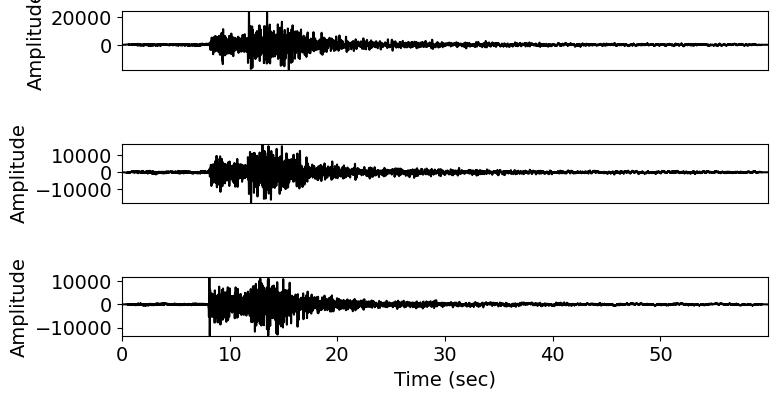

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

fl = h5py.File('/home/tza/STEAD/tza/merged.hdf5', 'r')
dataset = fl.get('data/' + 'TOUO.HV_20170219013724_EV')
print(dataset)

data = np.array(dataset)

fig = plt.figure(figsize=(8, 5))

# Divide the x-axis values by 100
x_values = np.arange(len(data)) / 100.0

ax = fig.add_subplot(411)
ax.set_xlim(x_values.min(), x_values.max())  # Set the x-axis limits
ax.set_ylim(data[:, 0].min(), data[:, 0].max())  # Set the y-axis limits
plt.plot(x_values, data[:, 0], 'k')
ax.set_ylabel("Amplitude")
plt.xticks([])
#plt.yticks([])
plt.tight_layout()

ax = fig.add_subplot(412)
ax.set_xlim(x_values.min(), x_values.max())  # Set the x-axis limits
ax.set_ylim(data[:, 1].min(), data[:, 1].max())  # Set the y-axis limits
plt.plot(x_values, data[:, 1], 'k')
plt.xticks([])
ax.set_ylabel("Amplitude")
#plt.yticks([])
plt.tight_layout()

ax = fig.add_subplot(413)
ax.set_xlim(x_values.min(), x_values.max())  # Set the x-axis limits
ax.set_ylim(data[:, 2].min(), data[:, 2].max())  # Set the y-axis limits
plt.plot(x_values, data[:, 2], 'k')
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Amplitude")
plt.tight_layout()

#plt.text(1.02, 2.90, 'E-component', fontsize=12, transform=ax.transAxes)
#plt.text(1.02, 1.68, 'N-component', fontsize=12, transform=ax.transAxes)
#plt.text(1.02, 0.42, 'Z-component', fontsize=12, transform=ax.transAxes)
plt.savefig("Plots/eqbasic.pdf", format="pdf", bbox_inches="tight")

plt.show()


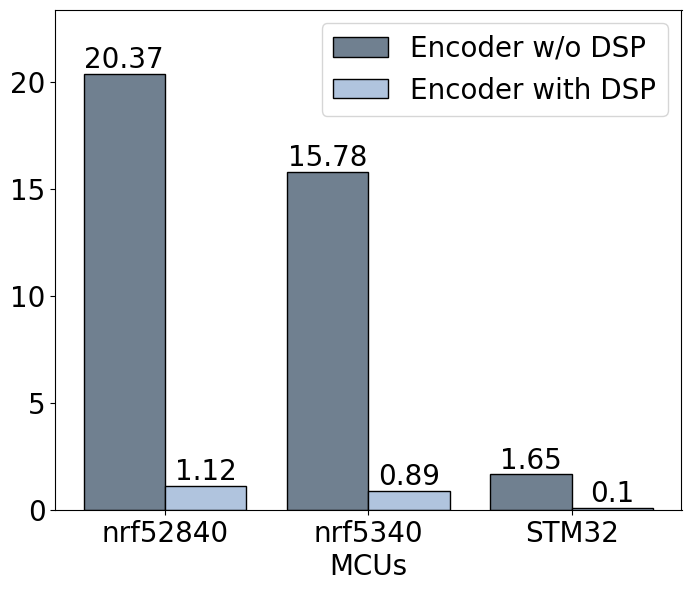

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Set width of bar
barWidth = 0.4
fig, ax = plt.subplots(figsize=(7, 6))

f=20
# Set height of bar
years = ['nrf52840', 'nrf5340', 'STM32']
encoder_without = [20.37, 15.78, 1.65]
encoder_with = [1.12, .89, .10]

# Calculate the positions for the bars with spacing
br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]

# Make the plot
a=plt.bar(br1, encoder_without, color='slategrey', width=barWidth, edgecolor='black', label='Encoder w/o DSP')
b=plt.bar(br2, encoder_with, color='lightsteelblue', width=barWidth, edgecolor='black', label='Encoder with DSP')

# Adding Xticks
plt.xlabel('MCUs', fontsize=f)
#plt.ylabel('Inference time (sec)', fontweight='bold', fontsize=20)
plt.xticks([r + 0.5* barWidth for r in range(len(years))], years, fontsize=f)
plt.ylim(0, max(max(encoder_without), max(encoder_with)) + 3)  # Adjust the space as needed
plt.yticks(fontsize=f)


legend = plt.legend(fontsize=f)
legend.set_bbox_to_anchor((1, 1))
ax.bar_label(a,label_type='edge',fontsize=f)
ax.bar_label(b,label_type='edge',fontsize=f)

plt.savefig('Plots/inference_encoder.pdf', format="pdf", bbox_inches="tight")
plt.show()



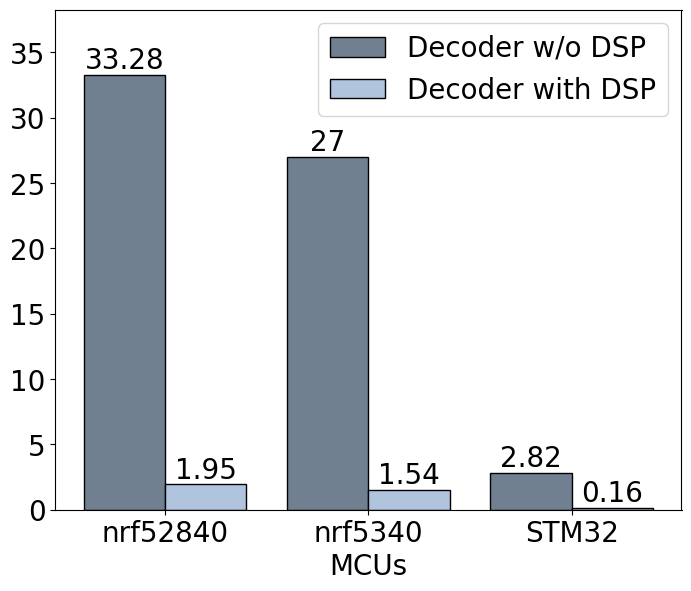

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Set width of bar
barWidth = 0.4
fig, ax = plt.subplots(figsize=(7,6))

# Set height of bar
years = ['nrf52840', 'nrf5340', 'STM32']

decoder_without = [33.28, 27.00, 2.82]
decoder_with = [1.95, 1.54, .16]

br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]

# Make the plot
a=plt.bar(br1, decoder_without, color='slategrey', width=barWidth, edgecolor='black', label='Decoder w/o DSP')
b=plt.bar(br2, decoder_with, color='lightsteelblue', width=barWidth, edgecolor='black', label='Decoder with DSP')

# Adding Xticks
plt.xlabel('MCUs', fontsize=f)
#plt.ylabel('Inference time (sec)', fontweight='bold', fontsize=20)
plt.xticks([r + 0.5* barWidth for r in range(len(years))], years, fontsize=f)
plt.ylim(0, max(max(decoder_without), max(decoder_without)) + 5)  # Adjust the space as needed
plt.yticks(fontsize=f)


legend=plt.legend(fontsize=f)
legend.set_bbox_to_anchor((1, 1))

ax.bar_label(a,label_type='edge',fontsize=f)
ax.bar_label(b,label_type='edge',fontsize=f)
plt.savefig('Plots/inference_decoder.pdf', format="pdf", bbox_inches="tight")
plt.show()



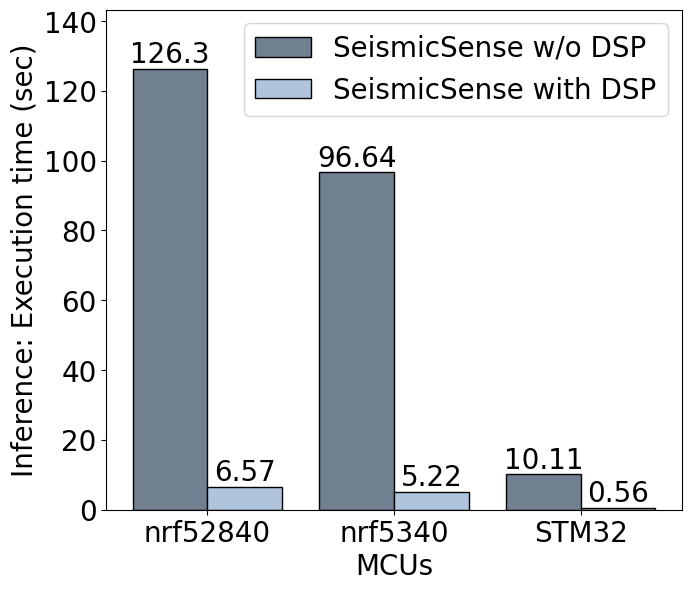

In [55]:
import numpy as np
import matplotlib.pyplot as plt

f=20
# Set width of bar
barWidth = 0.4
fig, ax = plt.subplots(figsize=(7,6))

# Set height of bar
years = ['nrf52840', 'nrf5340', 'STM32']

decoder_without = [126.3, 96.64, 10.11]
decoder_with = [6.57, 5.22, 0.56]

br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]

# Make the plot
a=plt.bar(br1, decoder_without, color='slategrey', width=barWidth, edgecolor='black', label='SeismicSense w/o DSP')
b=plt.bar(br2, decoder_with, color='lightsteelblue', width=barWidth, edgecolor='black', label='SeismicSense with DSP')

# Adding Xticks
plt.xlabel('MCUs', fontsize=f)
plt.ylabel('Inference: Execution time (sec)', fontsize=f)
plt.xticks([r + 0.5* barWidth for r in range(len(years))], years, fontsize=f)
plt.ylim(0, max(max(decoder_without), max(decoder_without)) + 17)  # Adjust the space as needed
plt.yticks(fontsize=f)


legend=plt.legend(fontsize=f)
legend.set_bbox_to_anchor((1, 1))
ax.bar_label(a,label_type='edge',fontsize=f)
ax.bar_label(b,label_type='edge',fontsize=f)

plt.savefig('Plots/inference_nn.pdf', format="pdf", bbox_inches="tight")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/detection.pdf'

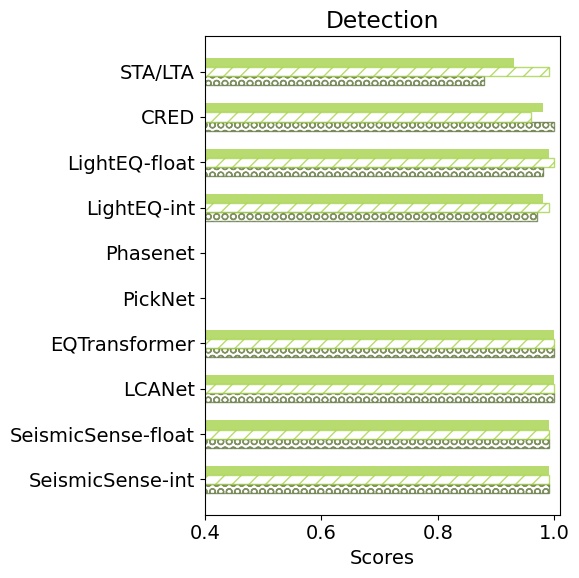

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ-float', 'LightEQ-int', 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense-float', 'SeismicSense-int']
precision = [0.88, 1.00, 0.98, 0.97, 0, 0, 1, 1, 0.99, 0.99]
recall =    [0.99, 0.96, 1.00, 0.99, 0, 0, 1, 1, 0.99, 0.99]
f1 =        [0.93, 0.98, 0.99, 0.98, 0, 0, 1, 1, 0.99, 0.99]

models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1 = f1[::-1]

fig, ax = plt.subplots(figsize=(6, 6))

# Set the number of bars and the spacing
n = len(models)
width = 0.2
space = 0.2

# Create the positions for the bars
index = np.arange(n)

# Create the bar plots for precision, recall, and F1 scores with spacing
plt.barh(index - space, precision, width, label='Precision', color='white', edgecolor='darkolivegreen', hatch="OO", alpha=0.7)
plt.barh(index, recall, width, label='Recall', color='white', edgecolor='yellowgreen', hatch="//", alpha=0.7)
plt.barh(index + space, f1, width, label='F1 Score', color='yellowgreen', alpha=0.7)

# Set the labels for the y-axis
plt.yticks(index, models)
plt.xlabel('Scores')
plt.xlim(0.40, 1.01)


# Add a legend
#plt.legend()

# Set the title and show the plot
plt.title('Detection')
plt.tight_layout()
plt.savefig('Plots/detection.pdf', format="pdf", bbox_inches="tight")

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/P-pick.pdf'

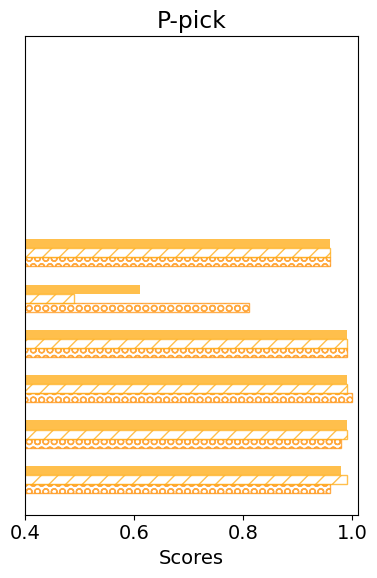

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ-float', 'LightEQ-int', 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense-float', 'SeismicSense-int']
precision = [0,0,0,0, 0.96, 0.81, 0.99, 1.00, 0.98, 0.96]
recall =    [0,0,0,0, 0.96, 0.49, 0.99, 0.99, 0.99, 0.99]
f1 =        [0,0,0,0, 0.96, 0.61, 0.99, 0.99, 0.99, 0.98]

models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1 = f1[::-1]

fig, ax = plt.subplots(figsize=(4, 6))

# Set the number of bars and the spacing
n = len(models)
width = 0.2
space = 0.2

# Create the positions for the bars
index = np.arange(n)

# Create the bar plots for precision, recall, and F1 scores with spacing
plt.barh(index - space, precision, width, label='Precision', color='white', edgecolor='darkorange', hatch="OO", alpha=0.7)
plt.barh(index, recall, width, label='Recall', color='white', edgecolor='orange', hatch="//", alpha=0.7)
plt.barh(index + space, f1, width, label='F1 Score', color='orange', alpha=0.7)

# Set the labels for the y-axis
#plt.yticks(index, models)
plt.yticks([])
plt.xlabel('Scores')
plt.xlim(0.40, 1.01)

#plt.legend()


# Set the title and show the plot
plt.title('P-pick')
plt.tight_layout()
plt.savefig('Plots/P-pick.pdf', format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ-float', 'LightEQ-int', 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense-float', 'SeismicSense-int']
precision = [0,0,0,0, 0.96, 0.75, 0.99, 1.00, 0.97, 0.93]
recall =    [0,0,0,0, 0.93, 0.75, 0.96, 0.96, 0.99, 0.98]
f1 =        [0,0,0,0, 0.94, 0.75, 0.98, 0.98, 0.98, 0.96]

models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1 = f1[::-1]

fig, ax = plt.subplots(figsize=(4, 6))

# Set the number of bars and the spacing
n = len(models)
width = 0.2
space = 0.2

# Create the positions for the bars
index = np.arange(n)

# Create the bar plots for precision, recall, and F1 scores with spacing
plt.barh(index - space, precision, width, label='Precision', color='white', edgecolor='steelblue', hatch="OO", alpha=0.7)
plt.barh(index, recall, width, label='Recall', color='white', edgecolor='steelblue', hatch="//", alpha=0.7)
plt.barh(index + space, f1, width, label='F1 Score', color='steelblue', alpha=0.7)

# Set the labels for the y-axis
#plt.yticks(index, models)
plt.yticks([])
plt.xlabel('Scores')


#plt.legend()
plt.xlim(0.40, 1.01)


# Set the title and show the plot
plt.title('S-pick')
plt.tight_layout()
plt.savefig('Plots/S-pick.pdf', format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ-float', 'LightEQ-int', 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense-float', 'SeismicSense-int']
precision = [0,0,0,0, 0.96, 0.75, 0.99, 1.00, 0.97, 0.93]
recall =    [0,0,0,0, 0.93, 0.75, 0.96, 0.96, 0.99, 0.98]
f1 =        [0,0,0,0, 0.94, 0.75, 0.98, 0.98, 0.98, 0.96]

models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1 = f1[::-1]

fig, ax = plt.subplots(figsize=(4, 6))

# Set the number of bars and the spacing
n = len(models)
width = 0.2
space = 0.2

# Create the positions for the bars
index = np.arange(n)

# Create the bar plots for precision, recall, and F1 scores with spacing
plt.barh(index - space, precision, width, label='Precision', color='white', edgecolor='dimgrey', hatch="OO", alpha=0.7)
plt.barh(index, recall, width, label='Recall', color='white', edgecolor='dimgrey', hatch="//", alpha=0.7)
plt.barh(index + space, f1, width, label='F1 Score', color='dimgrey', alpha=0.7)

# Set the labels for the y-axis
#plt.yticks(index, models)
plt.yticks([])
plt.xlabel('Scores')


plt.legend(loc='upper left',ncol=3, bbox_to_anchor=(1, 1))
plt.xlim(0.90, 1.01)


# Set the title and show the plot
plt.title('S-pick')
plt.tight_layout()
plt.savefig('Plots/legend.pdf', format="pdf", bbox_inches="tight")

plt.show()


7


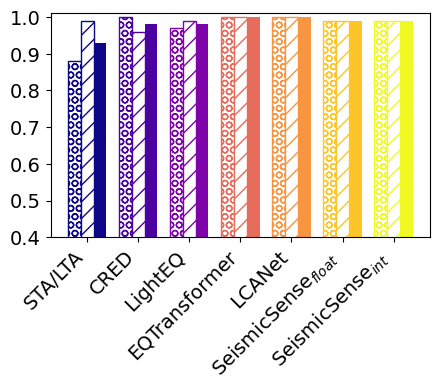

In [20]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ', 'EQTransformer', 'LCANet', 'SeismicSense$_{float}$','SeismicSense$_{int}$']
precision = [0.88, 1.00, 0.97,  1, 1, 0.99, 0.99]
recall =    [0.99, 0.96, 0.99,  1, 1, 0.99, 0.99]
f1 =        [0.93, 0.98, 0.98,  1, 1, 0.99, 0.99]


fig, ax = plt.subplots(figsize=(4.5, 4))

# Set the number of bars and the spacing
n = len(models)
print(n)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1,n+2 ))
#colors= ['steelblue','yellowgreen','indianred','lightcoral','darkorange','saddlebrown','gold', 'cadetblue','rebeccapurple','mediumpurple']

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    y=i
    if (i>2):
        y=i+2
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[y], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[y], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[y])


# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0.40, 1.01)
# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and show the plot
plt.tight_layout()
plt.savefig('Plots/D.pdf', format="pdf", bbox_inches="tight")

plt.show()


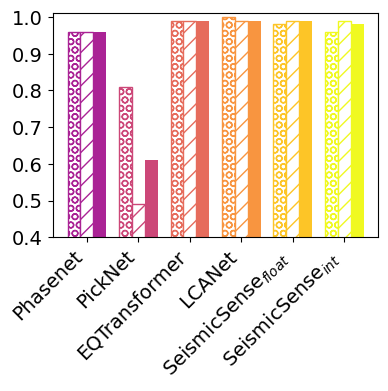

In [21]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = [ 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense$_{float}$','SeismicSense$_{int}$']
precision = [0.96, 0.81, 0.99, 1.00, 0.98, 0.96]
recall =    [ 0.96, 0.49, 0.99, 0.99, 0.99, 0.99]
f1 =        [0.96, 0.61, 0.99, 0.99, 0.99, 0.98]

fig, ax = plt.subplots(figsize=(4, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 9))
#colors= ['steelblue','yellowgreen','indianred','lightcoral','darkorange','saddlebrown','gold', 'cadetblue','rebeccapurple','mediumpurple']

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    y=i+3
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[y], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[y], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[y])

# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.40, 1.01)

# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and show the plot
plt.title('')
plt.tight_layout()
plt.savefig('Plots/P.pdf', format="pdf", bbox_inches="tight")

plt.show()


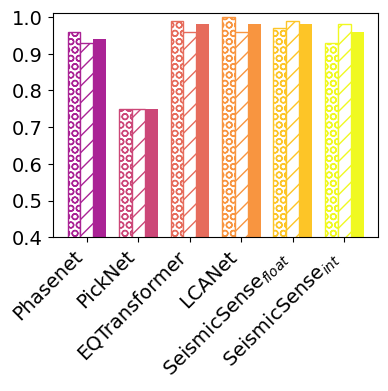

In [23]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = [ 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet','SeismicSense$_{float}$','SeismicSense$_{int}$']
precision = [ 0.96, 0.75, 0.99, 1.00, 0.97, 0.93]
recall =    [ 0.93, 0.75, 0.96, 0.96, 0.99, 0.98]
f1 =        [0.94, 0.75, 0.98, 0.98, 0.98, 0.96]
fig, ax = plt.subplots(figsize=(4, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 9))
#colors= ['steelblue','yellowgreen','indianred','lightcoral','darkorange','saddlebrown','gold', 'cadetblue','rebeccapurple','mediumpurple']

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    y=i+3
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[y], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[y], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[y])

# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.40, 1.01)

# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and show the plot
plt.title('')
plt.tight_layout()
plt.savefig('Plots/S.pdf', format="pdf", bbox_inches="tight")

plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

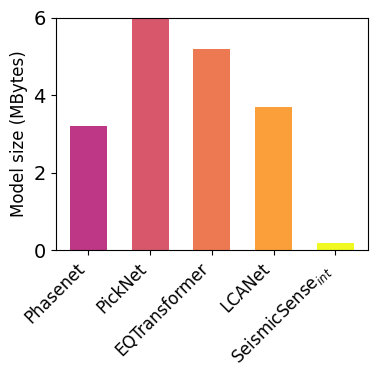

In [17]:
#plot for paper


import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding sizes
models = [ 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense$_{int}$', 'SeismicSense$_{int}$']
sizes = [3.2, 72.5, 5.2, 3.7, 0.18]

fig, ax = plt.subplots(figsize=(4, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.6

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 10))

# Create the bar plots for model sizes
for i in range(n):
    y=i+4
    if(i==4):
        y=i+5
    plt.bar(index[i], sizes[i], width, label=models[i], color=colors[y])

# Set the labels for the x-axis with increased font size
plt.xticks(index, models, rotation=45, ha="right", fontsize=12)
plt.ylabel('Model size (MBytes)', fontsize=12)
plt.ylim(0,6)
plt.set_ylim(6,76)

# Set the title and show the plot with an increased font size
plt.tight_layout()

# Increase the font size for y-axis tick labels
plt.yticks(fontsize=12)

plt.show()



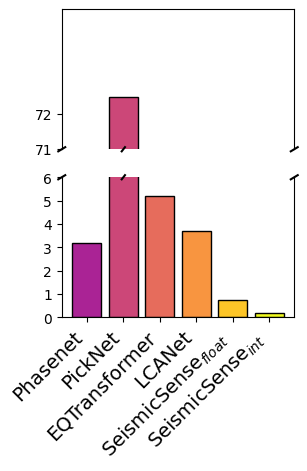

In [25]:
#plot for paper

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


XX = pd.Series([3.2, 72.5, 5.2, 3.7, 0.75 ,0.18], index=['Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense$_{float}$','SeismicSense$_{int}$'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(3, 4))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False)
ax2.spines['top'].set_visible(False)

bs = 6
ts = 71

ax2.set_ylim(0, bs)
ax1.set_ylim(ts, 75)
ax1.set_yticks(np.arange(71, 73, 1))
ax2.set_yticks(np.arange(0, 7, 1))


# Specify custom colors for the bars
colors = plt.cm.plasma(np.linspace(0, 1, 9))
colors=[colors[3],colors[4],colors[5],colors[6],colors[7],colors[8]]


bars1 = ax1.bar(XX.index, XX.values, color=colors,edgecolor='black')
bars2 = ax2.bar(XX.index, XX.values, color=colors, edgecolor='black')

# Increase x-axis label font size
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
    tick.set_fontsize(14)  # Set the font size here (e.g., 12)


d = 0.015


kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width() / 2.
    if b2.get_height() > bs:
        ax2.plot((posx - 3 * d, posx + 3 * d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx - 3 * d, posx + 3 * d), (-d, +d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())
        
#plt.ylabel('Model size (MBytes)', fontsize=14)
plt.savefig('Plots/size.pdf', format="pdf", bbox_inches="tight")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/SlideD.pdf'

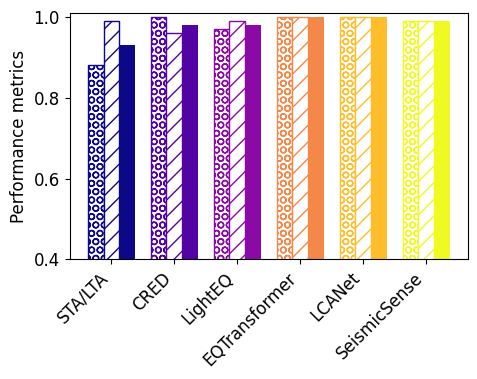

In [7]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = ['STA/LTA', 'CRED', 'LightEQ', 'EQTransformer', 'LCANet', 'SeismicSense']
precision = [0.88, 1.00, 0.97,  1, 1, 0.99]
recall =    [0.99, 0.96, 0.99,  1, 1, 0.99]
f1 =        [0.93, 0.98, 0.98,  1, 1, 0.99]


fig, ax = plt.subplots(figsize=(5, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 8))
colors = [colors[0],colors[1],colors[2],colors[5],colors[6], colors[7]]
#colors= ['steelblue','yellowgreen','indianred','lightcoral','darkorange','saddlebrown','gold', 'cadetblue','rebeccapurple','mediumpurple']

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[i], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[i], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[i])


# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0.40, 1.01)
# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Performance metrics', fontsize=12)

# Set the title and show the plot
plt.tight_layout()
plt.savefig('Plots/SlideD.pdf', format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = [ 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense']
precision = [0.96, 0.81, 0.99, 1.00, 0.96]
recall =    [ 0.96, 0.49, 0.99, 0.99, 0.99]
f1 =        [0.96, 0.61, 0.99, 0.99, 0.98]

fig, ax = plt.subplots(figsize=(4, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 8))
colors = [colors[3],colors[4],colors[5],colors[6],colors[7]]

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[i], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[i], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[i])

# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.40, 1.01)

# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and show the plot
plt.title('')
plt.tight_layout()
plt.savefig('Plots/SlidesP.pdf', format="pdf", bbox_inches="tight")

plt.show()


In [ ]:
#plot for paper

import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their corresponding precision, recall, and F1 scores
models = [ 'Phasenet', 'PickNet', 'EQTransformer', 'LCANet', 'SeismicSense']
precision = [ 0.96, 0.75, 0.99, 1.00, 0.93]
recall =    [ 0.93, 0.75, 0.96, 0.96, 0.98]
f1 =        [ 0.94, 0.75, 0.98, 0.98, 0.96]
fig, ax = plt.subplots(figsize=(4, 4))

# Set the number of bars and the spacing
n = len(models)
width = 0.25

# Create the positions for the bars
index = np.arange(n)

# Create a colormap for different colors for each model
colors = plt.cm.plasma(np.linspace(0, 1, 8))
colors = [colors[3],colors[4],colors[5],colors[6],colors[7]]

# Create the bar plots for precision, recall, and F1 scores
for i in range(n):
    plt.bar(index[i], precision[i], width, label=models[i], color='white', edgecolor=colors[i], hatch="OO")
    plt.bar(index[i] + width, recall[i], width, color='white', edgecolor=colors[i], hatch="//")
    plt.bar(index[i] + 2 * width, f1[i], width, color=colors[i])

# Set the labels for the x-axis
plt.xticks(index + width, models, rotation=45, ha="right",fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.40, 1.01)

# Add a legend
#plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and show the plot
plt.title('')
plt.tight_layout()
plt.savefig('Plots/SlidesS.pdf', format="pdf", bbox_inches="tight")

plt.show()
